In [4]:
from ovito.io import import_file, export_file
from ovito.modifiers import CoordinationAnalysisModifier, TimeAveragingModifier
from matplotlib import pyplot as plt
import numpy

In [8]:
# Load a simulation trajectory consisting of several frames:
pipeline = import_file("/Users/Michael_wang/Documents/venkat/mint-PD/PhaseDiagram-Clease/train-stress.extxyz")
print("Number of MD frames:", pipeline.source.num_frames)

# Insert the RDF calculation modifier into the pipeline:
pipeline.modifiers.append(CoordinationAnalysisModifier(cutoff = 5.0, number_of_bins = 200, partial=True))

# Insert the time-averaging modifier into the pipeline, which accumulates
# the instantaneous DataTable produced by the previous modifier and computes a mean histogram.
pipeline.modifiers.append(TimeAveragingModifier(operate_on='table:coordination-rdf'))

# Data export method 1: Convert to NumPy array and write data to a text file:
total_rdf = pipeline.compute().tables['coordination-rdf[average]'].xy()
# numpy.savetxt("rdf.txt", total_rdf)

# # Data export method 2: Use OVITO's own export function for DataTable objects:
# export_file(pipeline, "rdf.txt", "txt/table", key="coordination-rdf[average]")

Number of MD frames: 1095


In [6]:
total_rdf.shape

(200, 2)

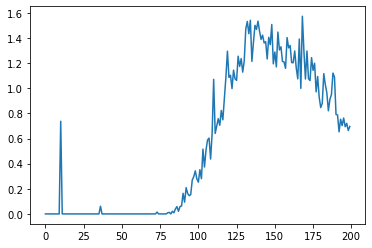

In [16]:
plt.plot(total_rdf[:, 6])

In [17]:
rdf_names = total_rdf.y.component_names

# Print a list of partial g(r) functions.
for component, name in enumerate(rdf_names):
    print("g(r) for pair-wise type combination %s:" % name)
    print(total_rdf.y[:,component])

AttributeError: 'numpy.ndarray' object has no attribute 'y'

: 